This is an auto-generated notebook

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [35]:
df = pd.read_csv("batchUdacity_TOTAL.csv")
df.drop(["Unnamed: 0", "matchId", "completed"], axis=1, inplace=True)
df.fillna(-1, inplace=True)
print(df.head(), df.shape)

   activityDurationSeconds  assists  averageKillDistance  averageScorePerKill  \
0                      753      6.0            12.450000           192.000000   
1                      753      5.0             3.190476           176.904762   
2                      753      8.0             9.562500           212.812500   
3                      753      5.0             9.000000           193.333333   
4                      753      4.0             8.857143           192.500000   

   averageScorePerLife  combatRating  deaths  kills  killsDeathsAssists  \
0           240.000000         120.0    15.0   20.0            1.533333   
1           195.526316         116.0    18.0   21.0            1.305556   
2           212.812500         106.0    15.0   16.0            1.333333   
3           138.095238          91.0    20.0   15.0            0.875000   
4           149.722222          84.0    17.0   14.0            0.941176   

   killsDeathsRatio   score  standing  team  weaponKillsHeavy 

In [28]:
df.describe()

,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
count,2.424921e+06,2.424921e+06,2.339500e+06,2.329253e+06,2.424921e+06,2.332404e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06
mean,5.909254e+02,4.037157e+00,1.602713e+01,2.050391e+02,1.945159e+02,1.325562e+02,1.085623e+01,1.077756e+01,1.387487e+00,1.177244e+00,2.274101e+03,5.088252e-01,1.649993e+01,3.176161e-01,3.118327e+00,3.633675e+00,1.739322e+00
std,1.195260e+02,2.913969e+00,8.849550e+00,2.480350e+02,3.006944e+02,1.170303e+02,4.932818e+00,6.342052e+00,1.298535e+00,1.176640e+00,3.098258e+03,4.999222e-01,5.000001e-01,9.206479e-01,2.787253e+00,3.338469e+00,2.750705e+00
min,5.400000e+01,0.000000e+00,2.500000e-01,5.000000e-02,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.230000e+02,2.000000e+00,1.016667e+01,1.234211e+02,5.078947e+01,7.200000e+01,7.000000e+00,6.000000e+00,7.380952e-01,5.882353e-01,4.850000e+02,0.000000e+00,1.600000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,5.960000e+02,4.000000e+00,1.450000e+01,1.866667e+02,1.350000e+02,1.010000e+02,1.100000e+01,1.000000e+01,1.115385e+00,9.333333e-01,1.765000e+03,1.000000e+00,1.600000e+01,0.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00
75%,6.670000e+02,6.000000e+00,2.000000e+01,2.303846e+02,2.292105e+02,1.400000e+02,1.500000e+01,1.500000e+01,1.642857e+00,1.400000e+00,2.980000e+03,1.000000e+00,1.700000e+01,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00
max,2.508000e+03,3.000000e+01,1.980000e+02,9.265000e+03,2.460000e+04,2.034000e+03,5.300000e+01,5.800000e+01,4.350000e+01,4.200000e+01,5.310000e+04,1.000000e+00,1.700000e+01,2.500000e+01,3.600000e+01,3.800000e+01,3.500000e+01


In [6]:
normalize(df).describe()

,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
count,2.424921e+06,2.424921e+06,2.339500e+06,2.329253e+06,2.424921e+06,2.332404e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06,2.424921e+06
mean,2.187960e-01,1.345719e-01,7.978323e-02,2.212523e-02,7.907152e-03,6.562958e-02,2.048345e-01,1.858199e-01,3.189626e-02,2.802963e-02,4.282677e-02,5.088252e-01,4.999334e-01,1.270464e-02,8.662019e-02,9.562302e-02,4.969491e-02
std,4.870662e-02,9.713231e-02,4.475120e-02,2.677132e-02,1.222335e-02,5.750875e-02,9.307205e-02,1.093457e-01,2.985138e-02,2.801525e-02,5.834761e-02,4.999222e-01,5.000001e-01,3.682591e-02,7.742369e-02,8.785444e-02,7.859158e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.911165e-01,6.666667e-02,5.014749e-02,1.331589e-02,2.064613e-03,3.587224e-02,1.320755e-01,1.034483e-01,1.696771e-02,1.400560e-02,9.133710e-03,0.000000e+00,0.000000e+00,0.000000e+00,2.777778e-02,2.631579e-02,0.000000e+00
50%,2.208639e-01,1.333333e-01,7.206068e-02,2.014222e-02,5.487805e-03,5.012285e-02,2.075472e-01,1.724138e-01,2.564103e-02,2.222222e-02,3.323917e-02,1.000000e+00,0.000000e+00,0.000000e+00,8.333333e-02,7.894737e-02,0.000000e+00
75%,2.497963e-01,2.000000e-01,9.987358e-02,2.486086e-02,9.317501e-03,6.928747e-02,2.830189e-01,2.586207e-01,3.776683e-02,3.333333e-02,5.612053e-02,1.000000e+00,1.000000e+00,0.000000e+00,1.388889e-01,1.315789e-01,8.571429e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [36]:
feature = "combatRating"
# TODO: Calculate Q1 (25th percentile of the data) for the given feature
Q1 = np.percentile(df[feature], 10)

# TODO: Calculate Q3 (75th percentile of the data) for the given feature
Q3 = np.percentile(df[feature], 90)

# TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
step = (Q3 - Q1)*(1.5)

print(Q1, Q3, step, " for features --", feature)

35.0 225.0 285.0  for features -- combatRating


In [15]:
from IPython.display import display # Allows the use of display() for DataFrames

In [39]:
# Display the outliers
outliers = []


for feature in df.columns:
    
    # TODO: Calculate Q1 (10th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], 10)

    # TODO: Calculate Q3 (90th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], 90)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*(1.5)
    
    print(Q1, Q3, step, " for features --", feature)   
    
    print("Data points considered outliers for the feature, ", feature)
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    outliers.append(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))].index.values)
    
#print(outliers)
for arrays, names in zip(outliers, df.columns):
    print(names, len(arrays))

443.0 733.0 435.0  for features -- activityDurationSeconds
Data points considered outliers for the feature,  activityDurationSeconds


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
34998,1201,3.0,34.000000,0.416667,0.357143,373.0,13.0,12.0,1.038462,0.923077,5.0,0.0,17,0.0,3.0,3.0,0.0
34999,1201,4.0,26.142857,0.714286,0.714286,375.0,6.0,7.0,1.500000,1.166667,5.0,0.0,17,0.0,1.0,5.0,0.0
35000,1201,0.0,30.545455,0.454545,0.833333,375.0,5.0,11.0,2.200000,2.200000,5.0,0.0,17,0.0,5.0,1.0,0.0
35001,1201,3.0,45.357143,0.214286,0.272727,225.0,10.0,14.0,1.550000,1.400000,3.0,1.0,16,0.0,0.0,8.0,0.0
35002,1201,1.0,111.000000,3.000000,0.250000,225.0,11.0,1.0,0.136364,0.090909,3.0,1.0,16,0.0,0.0,0.0,0.0
35003,1201,2.0,28.333333,0.333333,0.300000,225.0,9.0,9.0,1.111111,1.000000,3.0,1.0,16,0.0,3.0,4.0,0.0
381665,1220,0.0,16.666667,0.200000,0.600000,194.0,4.0,15.0,3.750000,3.750000,3.0,0.0,16,0.0,6.0,7.0,0.0
381666,1220,3.0,19.428571,0.428571,0.333333,196.0,8.0,7.0,1.062500,0.875000,3.0,1.0,17,0.0,0.0,4.0,3.0
381667,1220,2.0,45.000000,1.000000,0.375000,195.0,7.0,3.0,0.571429,0.428571,3.0,0.0,16,0.0,2.0,0.0,0.0
381668,1220,1.0,30.500000,0.750000,0.333333,195.0,8.0,4.0,0.562500,0.500000,3.0,1.0,17,0.0,2.0,0.0,0.0


1.0 8.0 10.5  for features -- assists
Data points considered outliers for the feature,  assists


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
1875,640,20.0,15.142857,268.928571,188.250000,120.0,19.0,14.0,1.263158,0.736842,3765.0,0.0,16,2.0,3.0,7.0,0.0
7758,725,21.0,11.285714,313.095238,469.642857,219.0,13.0,21.0,2.423077,1.615385,6575.0,0.0,17,0.0,2.0,12.0,2.0
28046,797,19.0,17.187500,175.937500,201.071429,84.0,13.0,16.0,1.961538,1.230769,2815.0,1.0,17,0.0,0.0,9.0,7.0
28069,806,21.0,21.250000,195.312500,223.214286,101.0,13.0,16.0,2.038462,1.230769,3125.0,0.0,16,0.0,9.0,5.0,0.0
28678,667,19.0,15.888889,1.444444,1.733333,126.0,14.0,18.0,1.964286,1.285714,26.0,0.0,16,0.0,9.0,4.0,0.0
28686,667,22.0,11.250000,2.250000,0.600000,43.0,14.0,4.0,1.071429,0.285714,9.0,0.0,16,0.0,0.0,4.0,0.0
28708,642,19.0,12.384615,1.153846,1.071429,66.0,13.0,13.0,1.730769,1.000000,15.0,1.0,16,0.0,8.0,5.0,0.0
28941,663,19.0,11.384615,1.538462,1.052632,89.0,18.0,13.0,1.250000,0.722222,20.0,0.0,16,0.0,3.0,8.0,0.0
29008,611,20.0,17.277778,0.722222,0.764706,51.0,16.0,18.0,1.750000,1.125000,13.0,1.0,16,0.0,4.0,11.0,1.0
29884,684,21.0,13.166667,1.250000,0.833333,73.0,17.0,12.0,1.323529,0.705882,15.0,1.0,16,0.0,3.0,6.0,1.0


5.81818181818 26.25 30.6477272727  for features -- averageKillDistance
Data points considered outliers for the feature,  averageKillDistance


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
720,509,0.0,63.000000,1.000000,0.111111,100.0,8.0,1.0,0.125000,0.125000,1.0,1.0,17,0.0,0.0,0.0,0.0
1017,419,0.0,57.500000,-1.000000,0.000000,-1.0,9.0,2.0,0.222222,0.222222,0.0,1.0,16,0.0,1.0,0.0,0.0
1326,341,0.0,71.000000,-1.000000,0.000000,-1.0,8.0,1.0,0.125000,0.125000,0.0,1.0,17,0.0,0.0,0.0,0.0
1327,617,3.0,58.000000,5.000000,0.833333,428.0,5.0,1.0,0.500000,0.200000,5.0,0.0,16,0.0,1.0,0.0,0.0
1350,860,4.0,82.285714,199.285714,279.000000,93.0,9.0,14.0,1.777778,1.555556,2790.0,1.0,16,0.0,0.0,2.0,0.0
1357,860,0.0,107.666667,156.666667,470.000000,87.0,0.0,3.0,3.000000,3.000000,470.0,0.0,17,0.0,0.0,0.0,0.0
2547,796,2.0,57.363636,218.181818,240.000000,91.0,9.0,11.0,1.333333,1.222222,2400.0,0.0,16,0.0,2.0,4.0,0.0
2552,796,0.0,73.111111,181.666667,204.375000,62.0,7.0,9.0,1.285714,1.285714,1635.0,1.0,17,0.0,1.0,0.0,0.0
2646,111,0.0,84.000000,-1.000000,0.000000,-1.0,1.0,1.0,1.000000,1.000000,0.0,1.0,17,0.0,1.0,0.0,0.0
3756,819,2.0,66.809524,125.000000,262.500000,169.0,9.0,21.0,2.444444,2.333333,2625.0,1.0,16,0.0,2.0,7.0,0.0


0.625 271.666666667 406.5625  for features -- averageScorePerKill
Data points considered outliers for the feature,  averageScorePerKill


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
1595,517,8.0,9.045455,1322.727273,1818.750000,173.0,15.0,22.0,1.733333,1.466667,29100.0,1.0,16,1.0,11.0,1.0,9.0
1596,517,5.0,12.684211,1360.526316,2154.166667,153.0,11.0,19.0,1.954545,1.727273,25850.0,0.0,17,0.0,8.0,4.0,0.0
1597,517,4.0,14.555556,1383.333333,1556.250000,148.0,15.0,18.0,1.333333,1.200000,24900.0,0.0,17,0.0,13.0,3.0,2.0
1598,517,8.0,8.428571,1403.571429,1228.125000,116.0,15.0,14.0,1.200000,0.933333,19650.0,1.0,16,0.0,7.0,2.0,4.0
1599,517,4.0,16.466667,1246.666667,2077.777778,111.0,8.0,15.0,2.125000,1.875000,18700.0,0.0,17,0.0,5.0,7.0,2.0
1600,517,8.0,6.416667,1495.833333,1055.882353,106.0,16.0,12.0,1.000000,0.750000,17950.0,0.0,17,1.0,5.0,0.0,6.0
1601,517,4.0,20.083333,1320.833333,2264.285714,94.0,6.0,12.0,2.333333,2.000000,15850.0,1.0,16,2.0,3.0,7.0,0.0
1602,517,3.0,15.200000,1300.000000,1000.000000,77.0,12.0,10.0,0.958333,0.833333,13000.0,1.0,16,2.0,4.0,3.0,0.0
1603,517,2.0,12.900000,1255.000000,896.428571,74.0,13.0,10.0,0.846154,0.769231,12550.0,1.0,16,3.0,3.0,0.0,3.0
1604,517,2.0,30.285714,1250.000000,546.875000,52.0,15.0,7.0,0.533333,0.466667,8750.0,0.0,17,0.0,0.0,0.0,0.0


0.555555555556 370.0 554.166666667  for features -- averageScorePerLife
Data points considered outliers for the feature,  averageScorePerLife


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
336,600,3.0,18.200000,131.750000,1317.500000,221.0,1.0,20.0,21.500000,20.000000,2635.0,0.0,17,0.0,1.0,5.0,0.0
469,558,6.0,11.280000,231.800000,965.833333,224.0,5.0,25.0,5.600000,5.000000,5795.0,0.0,16,0.0,5.0,17.0,0.0
572,572,5.0,18.050000,267.500000,1070.000000,207.0,4.0,20.0,5.625000,5.000000,5350.0,0.0,16,0.0,4.0,7.0,3.0
980,526,5.0,16.000000,205.000000,1161.666667,124.0,2.0,17.0,9.750000,8.500000,3485.0,0.0,17,1.0,4.0,8.0,3.0
1595,517,8.0,9.045455,1322.727273,1818.750000,173.0,15.0,22.0,1.733333,1.466667,29100.0,1.0,16,1.0,11.0,1.0,9.0
1596,517,5.0,12.684211,1360.526316,2154.166667,153.0,11.0,19.0,1.954545,1.727273,25850.0,0.0,17,0.0,8.0,4.0,0.0
1597,517,4.0,14.555556,1383.333333,1556.250000,148.0,15.0,18.0,1.333333,1.200000,24900.0,0.0,17,0.0,13.0,3.0,2.0
1598,517,8.0,8.428571,1403.571429,1228.125000,116.0,15.0,14.0,1.200000,0.933333,19650.0,1.0,16,0.0,7.0,2.0,4.0
1599,517,4.0,16.466667,1246.666667,2077.777778,111.0,8.0,15.0,2.125000,1.875000,18700.0,0.0,17,0.0,5.0,7.0,2.0
1600,517,8.0,6.416667,1495.833333,1055.882353,106.0,16.0,12.0,1.000000,0.750000,17950.0,0.0,17,1.0,5.0,0.0,6.0


35.0 225.0 285.0  for features -- combatRating
Data points considered outliers for the feature,  combatRating


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
611,521,1.0,22.444444,0.555556,0.714286,601.0,6.0,9.0,1.583333,1.500000,5.0,0.0,16,1.0,1.0,4.0,0.0
612,521,3.0,19.250000,1.250000,0.833333,600.0,5.0,4.0,1.100000,0.800000,5.0,0.0,16,0.0,0.0,3.0,0.0
613,521,5.0,16.454545,0.454545,1.250000,601.0,3.0,11.0,4.500000,3.666667,5.0,0.0,16,2.0,1.0,0.0,7.0
676,329,1.0,26.000000,0.555556,1.666667,600.0,2.0,9.0,4.750000,4.500000,5.0,0.0,16,1.0,1.0,0.0,5.0
677,329,3.0,27.166667,0.833333,1.250000,602.0,3.0,6.0,2.500000,2.000000,5.0,0.0,16,0.0,1.0,3.0,1.0
678,329,3.0,23.500000,1.250000,5.000000,602.0,0.0,4.0,5.500000,4.000000,5.0,0.0,16,1.0,1.0,1.0,0.0
814,357,1.0,34.625000,0.625000,1.666667,599.0,2.0,8.0,4.250000,4.000000,5.0,0.0,16,2.0,1.0,0.0,0.0
815,357,3.0,25.400000,1.000000,1.666667,599.0,2.0,5.0,3.250000,2.500000,5.0,0.0,16,0.0,1.0,3.0,0.0
816,357,3.0,15.166667,0.833333,2.500000,595.0,1.0,6.0,7.500000,6.000000,5.0,0.0,16,0.0,1.0,3.0,0.0
835,513,2.0,29.555556,0.555556,2.500000,601.0,1.0,9.0,10.000000,9.000000,5.0,0.0,16,0.0,0.0,6.0,0.0


4.0 17.0 19.5  for features -- deaths
Data points considered outliers for the feature,  deaths


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
393719,747,2.0,18.846154,146.538462,47.625000,67.0,39.0,13.0,0.358974,0.333333,1905.0,1.0,17,0.0,1.0,6.0,1.0
680097,629,1.0,14.500000,151.666667,19.782609,34.0,45.0,6.0,0.144444,0.133333,910.0,1.0,16,0.0,0.0,3.0,1.0
890433,638,0.0,11.000000,181.000000,20.111111,41.0,44.0,5.0,0.113636,0.113636,905.0,1.0,17,0.0,3.0,0.0,1.0
1339712,644,1.0,16.000000,200.000000,3.703704,6.0,53.0,1.0,0.028302,0.018868,200.0,0.0,17,0.0,0.0,0.0,0.0
1360792,801,1.0,8.500000,135.312500,52.804878,111.0,40.0,16.0,0.412500,0.400000,2165.0,1.0,16,2.0,5.0,2.0,4.0
1612836,796,2.0,7.444444,126.111111,29.102564,80.0,38.0,9.0,0.263158,0.236842,1135.0,1.0,17,0.0,5.0,1.0,1.0
1796811,707,0.0,32.500000,105.000000,10.243902,15.0,40.0,4.0,0.100000,0.100000,420.0,1.0,16,0.0,0.0,4.0,0.0
2113723,754,1.0,21.000000,335.000000,6.836735,10.0,48.0,1.0,0.031250,0.020833,335.0,1.0,17,0.0,1.0,0.0,0.0


3.0 19.0 24.0  for features -- kills
Data points considered outliers for the feature,  kills


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
24690,662,5.0,9.413043,31.739130,146.000000,586.0,9.0,46.0,5.388889,5.111111,1460.0,1.0,16,0.0,21.0,2.0,17.0
50263,793,2.0,22.111111,191.666667,575.000000,268.0,14.0,45.0,3.285714,3.214286,8625.0,0.0,16,10.0,4.0,15.0,0.0
109070,703,4.0,15.066667,176.777778,497.187500,240.0,15.0,45.0,3.133333,3.000000,7955.0,1.0,16,0.0,11.0,32.0,0.0
119930,507,2.0,4.295455,119.545455,657.500000,351.0,7.0,44.0,6.428571,6.285714,5260.0,0.0,16,0.0,30.0,3.0,11.0
147219,989,3.0,78.272727,161.931818,593.750000,206.0,11.0,44.0,4.136364,4.000000,7125.0,0.0,17,0.0,5.0,21.0,0.0
181974,788,3.0,12.553191,177.872340,597.142857,251.0,13.0,47.0,3.730769,3.615385,8360.0,1.0,16,3.0,12.0,18.0,13.0
189154,799,9.0,18.586957,196.413043,695.000000,297.0,12.0,46.0,4.208333,3.833333,9035.0,0.0,16,6.0,13.0,26.0,0.0
242016,655,2.0,19.733333,178.111111,728.636364,261.0,10.0,45.0,4.600000,4.500000,8015.0,0.0,17,0.0,14.0,21.0,0.0
274377,705,3.0,26.272727,168.750000,571.153846,235.0,12.0,44.0,3.791667,3.666667,7425.0,0.0,16,0.0,2.0,25.0,0.0
285323,807,0.0,7.173913,114.130435,291.666667,250.0,17.0,46.0,2.705882,2.705882,5250.0,0.0,16,1.0,15.0,8.0,19.0


0.4375 2.42857142857 2.98660714286  for features -- killsDeathsAssists
Data points considered outliers for the feature,  killsDeathsAssists


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
93,522,5.0,30.055556,135.000000,810.000000,167.0,2.0,18.0,10.250000,9.0,2430.0,0.0,17,0.0,3.0,4.0,0.0
331,443,4.0,30.363636,142.727273,785.000000,138.0,1.0,11.0,13.000000,11.0,1570.0,0.0,16,0.0,0.0,3.0,0.0
336,600,3.0,18.200000,131.750000,1317.500000,221.0,1.0,20.0,21.500000,20.0,2635.0,0.0,17,0.0,1.0,5.0,0.0
342,477,5.0,13.444444,135.277778,608.750000,203.0,3.0,18.0,6.833333,6.0,2435.0,0.0,16,3.0,2.0,0.0,10.0
368,580,2.0,21.750000,135.416667,812.500000,144.0,1.0,12.0,13.000000,12.0,1625.0,0.0,16,2.0,3.0,6.0,1.0
469,558,6.0,11.280000,231.800000,965.833333,224.0,5.0,25.0,5.600000,5.0,5795.0,0.0,16,0.0,5.0,17.0,0.0
572,572,5.0,18.050000,267.500000,1070.000000,207.0,4.0,20.0,5.625000,5.0,5350.0,0.0,16,0.0,4.0,7.0,3.0
659,572,0.0,22.727273,0.454545,1.666667,428.0,2.0,11.0,5.500000,5.5,5.0,0.0,17,0.0,5.0,5.0,0.0
678,329,3.0,23.500000,1.250000,5.000000,602.0,0.0,4.0,5.500000,4.0,5.0,0.0,16,1.0,1.0,1.0,0.0
683,410,4.0,22.625000,0.625000,2.500000,501.0,1.0,8.0,10.000000,8.0,5.0,0.0,17,0.0,2.0,0.0,3.0


0.333333333333 2.11111111111 2.66666666667  for features -- killsDeathsRatio
Data points considered outliers for the feature,  killsDeathsRatio


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
93,522,5.0,30.055556,135.000000,810.000000,167.0,2.0,18.0,10.250000,9.00,2430.0,0.0,17,0.0,3.0,4.0,0.0
330,443,2.0,16.458333,116.250000,465.000000,244.0,5.0,24.0,5.000000,4.80,2790.0,0.0,16,3.0,1.0,9.0,7.0
331,443,4.0,30.363636,142.727273,785.000000,138.0,1.0,11.0,13.000000,11.00,1570.0,0.0,16,0.0,0.0,3.0,0.0
336,600,3.0,18.200000,131.750000,1317.500000,221.0,1.0,20.0,21.500000,20.00,2635.0,0.0,17,0.0,1.0,5.0,0.0
342,477,5.0,13.444444,135.277778,608.750000,203.0,3.0,18.0,6.833333,6.00,2435.0,0.0,16,3.0,2.0,0.0,10.0
368,580,2.0,21.750000,135.416667,812.500000,144.0,1.0,12.0,13.000000,12.00,1625.0,0.0,16,2.0,3.0,6.0,1.0
469,558,6.0,11.280000,231.800000,965.833333,224.0,5.0,25.0,5.600000,5.00,5795.0,0.0,16,0.0,5.0,17.0,0.0
572,572,5.0,18.050000,267.500000,1070.000000,207.0,4.0,20.0,5.625000,5.00,5350.0,0.0,16,0.0,4.0,7.0,3.0
659,572,0.0,22.727273,0.454545,1.666667,428.0,2.0,11.0,5.500000,5.50,5.0,0.0,17,0.0,5.0,5.0,0.0
683,410,4.0,22.625000,0.625000,2.500000,501.0,1.0,8.0,10.000000,8.00,5.0,0.0,17,0.0,2.0,0.0,3.0


4.0 4180.0 6264.0  for features -- score
Data points considered outliers for the feature,  score


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
1595,517,8.0,9.045455,1322.727273,1818.750000,173.0,15.0,22.0,1.733333,1.466667,29100.0,1.0,16,1.0,11.0,1.0,9.0
1596,517,5.0,12.684211,1360.526316,2154.166667,153.0,11.0,19.0,1.954545,1.727273,25850.0,0.0,17,0.0,8.0,4.0,0.0
1597,517,4.0,14.555556,1383.333333,1556.250000,148.0,15.0,18.0,1.333333,1.200000,24900.0,0.0,17,0.0,13.0,3.0,2.0
1598,517,8.0,8.428571,1403.571429,1228.125000,116.0,15.0,14.0,1.200000,0.933333,19650.0,1.0,16,0.0,7.0,2.0,4.0
1599,517,4.0,16.466667,1246.666667,2077.777778,111.0,8.0,15.0,2.125000,1.875000,18700.0,0.0,17,0.0,5.0,7.0,2.0
1600,517,8.0,6.416667,1495.833333,1055.882353,106.0,16.0,12.0,1.000000,0.750000,17950.0,0.0,17,1.0,5.0,0.0,6.0
1601,517,4.0,20.083333,1320.833333,2264.285714,94.0,6.0,12.0,2.333333,2.000000,15850.0,1.0,16,2.0,3.0,7.0,0.0
1602,517,3.0,15.200000,1300.000000,1000.000000,77.0,12.0,10.0,0.958333,0.833333,13000.0,1.0,16,2.0,4.0,3.0,0.0
1603,517,2.0,12.900000,1255.000000,896.428571,74.0,13.0,10.0,0.846154,0.769231,12550.0,1.0,16,3.0,3.0,0.0,3.0
1607,360,6.0,18.578947,1268.421053,2677.777778,165.0,8.0,19.0,2.750000,2.375000,24100.0,0.0,17,1.0,5.0,8.0,5.0


0.0 1.0 1.5  for features -- standing
Data points considered outliers for the feature,  standing


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary


16.0 17.0 1.5  for features -- team
Data points considered outliers for the feature,  team


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary


0.0 1.0 1.5  for features -- weaponKillsHeavy
Data points considered outliers for the feature,  weaponKillsHeavy


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
43,965,2.0,21.787879,215.303030,888.125000,211.0,7.0,33.0,4.857143,4.714286,7105.0,0.0,16,3.0,7.0,7.0,0.0
121,704,3.0,6.285714,219.642857,180.882353,102.0,16.0,14.0,0.968750,0.875000,3075.0,1.0,17,3.0,6.0,0.0,1.0
134,746,4.0,14.000000,243.846154,198.125000,95.0,15.0,13.0,1.000000,0.866667,3170.0,0.0,17,3.0,4.0,5.0,0.0
227,619,3.0,21.285714,117.500000,149.545455,100.0,10.0,14.0,1.550000,1.400000,1645.0,1.0,17,3.0,1.0,5.0,3.0
233,566,3.0,14.909091,117.954545,199.615385,164.0,12.0,22.0,1.958333,1.833333,2595.0,0.0,17,5.0,5.0,3.0,8.0
262,813,2.0,16.277778,202.222222,303.333333,152.0,11.0,18.0,1.727273,1.636364,3640.0,0.0,17,4.0,2.0,9.0,0.0
288,564,8.0,25.434783,128.913043,269.545455,182.0,10.0,23.0,2.700000,2.300000,2965.0,1.0,16,4.0,4.0,12.0,0.0
302,491,5.0,7.066667,129.666667,243.125000,132.0,7.0,15.0,2.500000,2.142857,1945.0,0.0,17,3.0,5.0,5.0,2.0
330,443,2.0,16.458333,116.250000,465.000000,244.0,5.0,24.0,5.000000,4.800000,2790.0,0.0,16,3.0,1.0,9.0,7.0
342,477,5.0,13.444444,135.277778,608.750000,203.0,3.0,18.0,6.833333,6.000000,2435.0,0.0,16,3.0,2.0,0.0,10.0


0.0 7.0 10.5  for features -- weaponKillsOther
Data points considered outliers for the feature,  weaponKillsOther


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
32,679,4.0,10.578947,119.078947,411.363636,271.0,10.0,38.0,4.000000,3.800000,4525.0,0.0,16,0.0,18.0,12.0,2.0
533,542,4.0,5.304348,202.391304,290.937500,147.0,15.0,23.0,1.666667,1.533333,4655.0,0.0,16,1.0,18.0,3.0,0.0
3592,663,3.0,4.366667,118.666667,323.636364,206.0,10.0,30.0,3.150000,3.000000,3560.0,1.0,16,0.0,22.0,2.0,4.0
4487,619,4.0,4.680000,220.600000,306.388889,184.0,17.0,25.0,1.588235,1.470588,5515.0,1.0,16,1.0,22.0,1.0,0.0
5371,808,5.0,10.833333,206.333333,442.142857,185.0,13.0,30.0,2.500000,2.307692,6190.0,0.0,16,0.0,21.0,7.0,2.0
8060,464,3.0,7.083333,1270.833333,2178.571429,199.0,13.0,24.0,1.961538,1.846154,30500.0,0.0,16,3.0,18.0,0.0,1.0
10108,704,4.0,8.086957,166.086957,152.800000,135.0,24.0,23.0,1.041667,0.958333,3820.0,1.0,16,0.0,20.0,0.0,0.0
10110,704,1.0,3.750000,142.000000,123.478261,100.0,22.0,20.0,0.931818,0.909091,2840.0,1.0,16,0.0,19.0,0.0,1.0
11748,639,5.0,5.257143,217.428571,761.000000,267.0,9.0,35.0,4.166667,3.888889,7610.0,0.0,16,0.0,24.0,1.0,7.0
13229,646,5.0,4.333333,214.814815,386.666667,194.0,14.0,27.0,2.107143,1.928571,5800.0,0.0,16,0.0,21.0,1.0,4.0


0.0 8.0 12.0  for features -- weaponKillsPrimary
Data points considered outliers for the feature,  weaponKillsPrimary


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
2464,528,2.0,24.269231,191.538462,711.428571,178.0,6.0,26.0,4.500000,4.333333,4980.0,0.0,17,0.0,3.0,21.0,0.0
4539,666,4.0,9.342857,211.714286,673.636364,235.0,10.0,35.0,3.700000,3.500000,7410.0,0.0,17,0.0,14.0,21.0,0.0
5211,612,10.0,15.914286,201.285714,640.454545,221.0,10.0,35.0,4.000000,3.500000,7045.0,0.0,16,0.0,8.0,26.0,0.0
5479,694,14.0,12.542857,215.285714,376.750000,236.0,19.0,35.0,2.210526,1.842105,7535.0,0.0,17,0.0,3.0,27.0,0.0
7873,708,5.0,16.043478,206.086957,474.000000,147.0,9.0,23.0,2.833333,2.555556,4740.0,0.0,16,0.0,1.0,21.0,1.0
10900,594,9.0,16.576923,214.423077,464.583333,196.0,11.0,26.0,2.772727,2.363636,5575.0,0.0,16,0.0,0.0,22.0,0.0
14440,556,6.0,25.032258,181.612903,804.285714,196.0,6.0,31.0,5.666667,5.166667,5630.0,0.0,17,0.0,2.0,24.0,0.0
26301,762,6.0,27.000000,206.060606,400.000000,206.0,16.0,33.0,2.250000,2.062500,6800.0,1.0,17,0.0,5.0,22.0,0.0
28067,806,13.0,29.551724,141.551724,256.562500,132.0,15.0,29.0,2.366667,1.933333,4105.0,1.0,17,0.0,5.0,21.0,3.0
28184,755,0.0,14.178571,105.000000,210.000000,183.0,13.0,28.0,2.153846,2.153846,2940.0,0.0,17,0.0,1.0,23.0,0.0


0.0 5.0 7.5  for features -- weaponKillsSecondary
Data points considered outliers for the feature,  weaponKillsSecondary


,activityDurationSeconds,assists,averageKillDistance,averageScorePerKill,averageScorePerLife,combatRating,deaths,kills,killsDeathsAssists,killsDeathsRatio,score,standing,team,weaponKillsHeavy,weaponKillsOther,weaponKillsPrimary,weaponKillsSecondary
280,625,3.0,3.800000,160.250000,178.055556,96.0,17.0,20.0,1.264706,1.176471,3205.0,0.0,16,0.0,2.0,0.0,16.0
403,451,6.0,12.230769,124.230769,403.750000,260.0,7.0,26.0,4.142857,3.714286,3230.0,0.0,17,0.0,10.0,0.0,16.0
432,613,2.0,12.000000,191.315789,302.916667,125.0,11.0,19.0,1.818182,1.727273,3635.0,1.0,17,0.0,1.0,0.0,15.0
495,672,6.0,10.791667,214.375000,395.769231,159.0,12.0,24.0,2.250000,2.000000,5145.0,0.0,16,2.0,2.0,0.0,17.0
508,654,9.0,15.266667,194.833333,584.500000,176.0,9.0,30.0,3.833333,3.333333,5845.0,0.0,17,0.0,3.0,0.0,23.0
524,496,1.0,15.636364,147.727273,270.833333,122.0,11.0,22.0,2.045455,2.000000,3250.0,1.0,17,0.0,2.0,0.0,13.0
537,542,2.0,7.736842,164.473684,260.416667,99.0,11.0,19.0,1.818182,1.727273,3125.0,1.0,17,0.0,5.0,0.0,14.0
629,667,4.0,15.826087,208.913043,369.615385,146.0,12.0,23.0,2.083333,1.916667,4805.0,0.0,17,0.0,2.0,0.0,20.0
630,667,6.0,15.454545,211.818182,274.117647,142.0,16.0,22.0,1.562500,1.375000,4660.0,1.0,16,0.0,0.0,0.0,17.0
721,570,3.0,5.320000,114.200000,237.916667,165.0,11.0,25.0,2.409091,2.272727,2855.0,0.0,17,0.0,5.0,1.0,14.0


activityDurationSeconds 74
assists 523
averageKillDistance 9107
averageScorePerKill 80936
averageScorePerLife 65846
combatRating 55703
deaths 8
kills 138
killsDeathsAssists 39434
killsDeathsRatio 40029
score 61786
standing 0
team 0
weaponKillsHeavy 93804
weaponKillsOther 1406
weaponKillsPrimary 1126
weaponKillsSecondary 19462


In [12]:
testdf = normalize(df)
testdf = testdf[:6]

In [13]:
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import andrews_curves

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

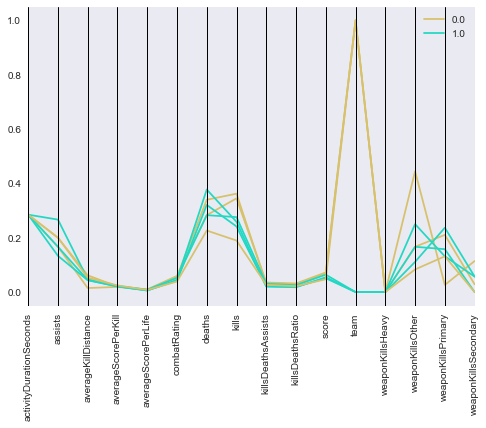

In [14]:
parallel_coordinates(testdf, 'standing')
plt.xticks(rotation=90)

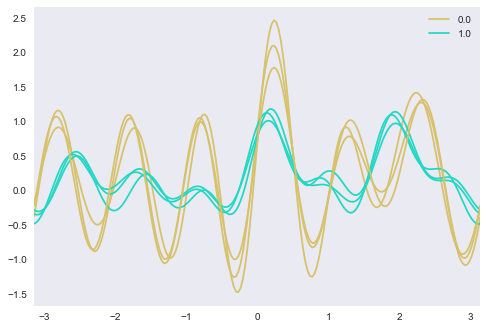

In [15]:
andrews_curves(testdf, "standing")

In [16]:
df2 = normalize(df)
df2 = df2[6:12]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

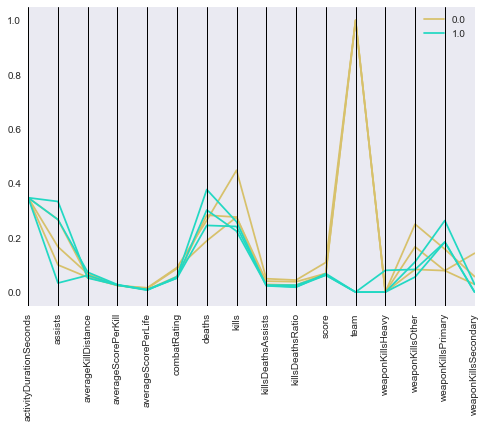

In [17]:
parallel_coordinates(df2, "standing")
plt.xticks(rotation=90)

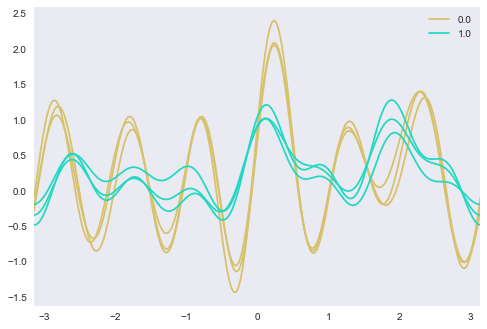

In [18]:
andrews_curves(df2, "standing")